In [1]:
import numpy as np
import pymysql
import pandas as pd
import seaborn as sns

from tqdm import tqdm

In [2]:
# 시각화 모듈 임포트
import matplotlib.pyplot as plt
import seaborn as sns

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
game_log = pd.read_csv("game_log.csv", encoding='utf-8-sig', index_col='game_log_idx')

In [4]:
# game_log = game_log.sort_values(by=['user_idx', 'unit'])

In [5]:
# game_log.to_csv("game_log_sort.csv", encoding='utf-8-sig')

In [6]:
game_log

,game_log_next_level,game_log_level,game_log_limit,game_log_score,game_log_success,assignment_unit_user,userId,birth,gender,education,height,name,organization,unit,create_time,user_idx,game_log_time,age,duration_date
game_log_idx,,,,,,,,,,,,,,,,,,,
721,4,4,300,100.0,100.00,1045,A0001,19520219,M,16,172,소필영,로아신경과의원,2,2021-05-10 11:27:46,39,286.900000,71.0,318
749,3,3,180,2000.0,95.24,1046,A0001,19520219,M,16,172,소필영,로아신경과의원,9,2021-05-10 11:27:46,39,5.195238,71.0,318
768,3,3,180,2300.0,95.83,1046,A0001,19520219,M,16,172,소필영,로아신경과의원,9,2021-05-10 11:27:46,39,4.183333,71.0,318
718,3,3,180,400.0,100.00,1048,A0001,19520219,M,16,172,소필영,로아신경과의원,17,2021-05-10 11:27:46,39,35.475000,71.0,318
719,3,3,180,1000.0,83.33,1048,A0001,19520219,M,16,172,소필영,로아신경과의원,17,2021-05-10 11:27:46,39,13.033333,71.0,318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70007,2,2,120,400.0,100.00,118189,ndb006,19451202,F,6,160,박정선,남양주백병원,15,2022-02-28 16:23:20,1059,20.225000,78.0,24
70008,2,2,120,100.0,100.00,118189,ndb006,19451202,F,6,160,박정선,남양주백병원,15,2022-02-28 16:23:20,1059,98.500000,78.0,24
70009,2,2,120,1000.0,90.91,118190,ndb006,19451202,F,6,160,박정선,남양주백병원,18,2022-02-28 16:23:20,1059,8.990909,78.0,24


In [7]:
# game_log = game_log[game_log['unit']==2]

In [8]:
def unit_stats(x):
    df = {}
    
    for unit in range(1,25):
        
        df['unit'+str(unit)+'_time'] = x['game_log_time'][x['unit'] == unit].values.tolist()
        df['unit'+str(unit)+'_score'] = x['game_log_success'][x['unit'] == unit].values.tolist()
        df['unit'+str(unit)+'_level'] = x['game_log_level'][x['unit'] == unit].values.tolist()
        
    return pd.Series(df)

In [9]:
game_user_log = game_log.groupby(['user_idx']).apply(unit_stats)

In [10]:
game_user_log = game_user_log.replace(0, np.NaN)
game_user_log

,unit1_time,unit1_score,unit1_level,unit2_time,unit2_score,unit2_level,unit3_time,unit3_score,unit3_level,unit4_time,...,unit21_level,unit22_time,unit22_score,unit22_level,unit23_time,unit23_score,unit23_level,unit24_time,unit24_score,unit24_level
user_idx,,,,,,,,,,,,,,,,,,,,,
39,"[14.828571428571427, 10.946666666666664, 11.1,...","[71.43, 93.33, 88.89, 100.0, 94.44, 100.0, 100...","[5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 7, 6, 7, 7, 7, ...","[286.9, 75.25, 232.0, 219.3, 255.7, 244.0, 258...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[4, 5, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, ...","[70.03333333333333, 53.625, 80.2, 74.433333333...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[3, 4, 4, 5, 5, 6, 6, 7, 7, 7]","[4.336, 10.293333333333331, 13.541666666666664...",...,"[3, 5]","[7.207692307692308, 9.2125]","[84.62, 81.25]","[3, 5]",[],[],[],[],[],[]
42,"[10.8, 9.428571428571429, 9.380952380952378, 8...","[100.0, 100.0, 100.0, 100.0, 89.47, 89.47, 100...","[5, 6, 6, 6, 7, 7, 7, 8, 2]","[40.371428571428574, 68.925, 35.91111111111111...","[100.0, 75.0, 100.0, 100.0, 100.0, 100.0, 100....","[3, 3, 5, 5, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 8, ...","[24.44545454545454, 18.935714285714287, 53.85,...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[4, 4, 5, 6, 5, 6, 7, 6, 7, 2]","[5.6875, 5.763636363636364, 6.739999999999999,...",...,[],[],[],[],[],[],[],[],[],[]
50,[],[],[],[],[],[],[],[],[],[],...,[],[23.542857142857144],[57.14],[1],[],[],[],[],[],[]
51,"[9.177272727272728, 8.262500000000001, 8.5, 8....","[100.0, 100.0, 86.96, 96.97, 97.14, 97.06, 92....","[3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 5, 4, 4, ...","[35.625, 45.71666666666667, 35.15, 18.69333333...","[12.5, 16.67, 12.5, 73.33, 72.22, 100.0, 55.56...","[3, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, ...","[24.33333333333333, 16.6, 17.575, 18.771428571...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 5, 5, 6, ...","[2.7285714285714286, 2.309090909090909, 1.4557...",...,"[3, 3, 3, 4, 5, 6, 6, 6, 6, 6, 6, 5, 5, 6, 6, ...",[],[],[],[],[],[],[],[],[]
91,"[2.6833333333333336, 0.4230769230769231, 0.311...","[58.33, 100.0, 100.0, 92.31]","[3, 2, 2, 2]","[133.65, 157.8, 133.5, 132.0, 219.2, 88.666666...","[50.0, 100.0, 0.0, 50.0, 0.0, 33.33, 50.0, 100...","[2, 2, 2, 2, 2, 2, 2, 2, 2]","[16.5, 22.31, 14.585714285714287, 18.175, 13.5...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0]","[1, 1, 1, 1, 1, 2]","[2.393023255813953, 4.525806451612904, 2.55714...",...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,[],[],[],"[59.16666666666666, 31.98, 46.43333333333334, ...","[66.67, 60.0, 66.67, 50.0, 50.0, 60.0, 100.0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[16.766666666666666, 26.1, 18.950000000000003,...","[100.0, 100.0, 100.0, 100.0, 100.0]","[1, 1, 1, 1, 1]",[],...,[],"[7.557894736842105, 3.91875, 6.780952380952381]","[78.95, 84.38, 85.71]","[1, 1, 2]",[],[],[],[],[],[]
1029,[],[],[],"[53.0, 79.5, 45.63333333333333]","[66.67, 50.0, 100.0]","[1, 1, 1]","[14.28181818181818, 11.946153846153846, 12.458...","[100.0, 100.0, 100.0]","[1, 1, 1]",[],...,[],"[4.851851851851852, 7.125, 3.081081081081081, ...","[77.78, 40.0, 86.49, 59.09]","[1, 2, 1, 2]",[],[],[],[],[],[]
1041,"[10.135135135135137, 10.135135135135137, 2.402...","[94.59, 94.59, 100.0, 95.12, 100.0, 100.0]","[4, 4, 4, 4, 4, 5]","[164.6, 51.4, 117.96666666666668, 73.399999999...","[0.0, 100.0, 66.67, 50.0, 50.0, 40.0]","[4, 4, 5, 5, 5, 5]",[35.475],[100.0],[4],"[11.33157894736842, 5.409677419354837, 7.27916...",...,"[4, 4, 6]","[14.03157894736842, 5.73]","[57.89, 97.5]","[4, 4]","[14.031578947368422, 14.031578947368422, 11.69...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0]","[4, 4, 4, 4, 6, 6]","[143.57500000000002, 143.57500000000002, 116.5...","[100.0, 100.0, 100.0, 100.0, 100.0, 100.0]","[4, 4, 5, 5, 5, 5]"


In [21]:
game_log_itv = pd.DataFrame(index=game_user_log.index, columns=[0,1,2,3])
for idx,val in game_user_log.iterrows():
    if len(val['unit1_time'])<5:
        continue
    elif len(val['unit1_time'])<10:
        game_log_itv.loc[idx][0] = val['unit1_time'][0]
        game_log_itv.loc[idx][1] = val['unit1_time'][4]
    elif len(val['unit1_time'])<14:
        game_log_itv.loc[idx][0] = val['unit1_time'][0]
        game_log_itv.loc[idx][1] = val['unit1_time'][4]
        game_log_itv.loc[idx][2] = val['unit1_time'][8]
    else:
        game_log_itv.loc[idx][0] = val['unit1_time'][0]
        game_log_itv.loc[idx][1] = val['unit1_time'][4]
        game_log_itv.loc[idx][2] = val['unit1_time'][8]
        game_log_itv.loc[idx][3] = val['unit1_time'][12]

In [23]:
game_log_itv.to_csv("real_temp.csv")

In [23]:
game_user_log2 = game_log.groupby(['user_idx']).apply(unit_stats)

TypeError: 'numpy.ndarray' object is not callable

In [95]:
count_stats_part = count_stats.loc[1:20]

<AxesSubplot:xlabel='unit', ylabel='counts'>

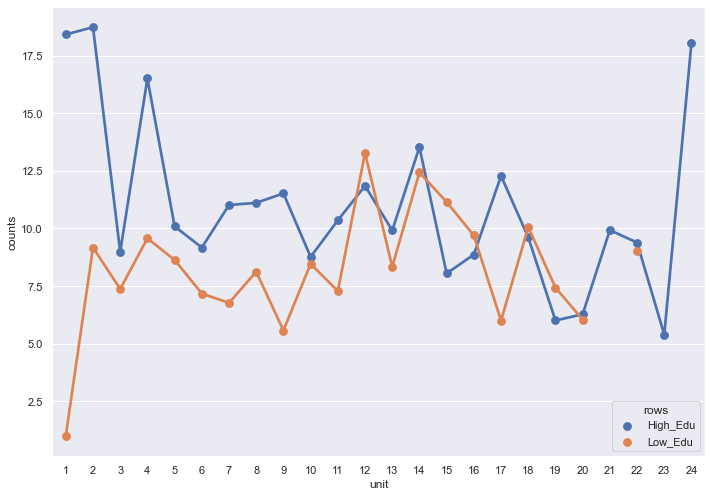

In [97]:
csm = count_stats.melt('unit', var_name='rows', value_name='counts')
sns.pointplot(x="unit", y="counts", hue='rows', data=csm)

In [99]:
def unit_stats(x):
    df = {}
    idx = ['Category']
    
    for unit in range(1,25):
        label_speed = 'unit' + str(unit) + '_speed'
        label_score = 'unit' + str(unit) + '_score'
        label_level = 'unit' + str(unit) + '_level'
        label_ratio = 'unit' + str(unit) + '_ratio'
        
        df[label_speed] = x[x['unit'] == unit]['game_log_speed'].mean()
        df[label_score] = x[x['unit'] == unit]['game_log_success'].mean()
        df[label_level] = x[x['unit'] == unit]['game_log_level'].mean()
        df[label_ratio] = df[label_speed] / df[label_level]
        df['Category'] = x.iloc[0]['Label2']
        
        idx.append(label_speed)
        idx.append(label_score)
        idx.append(label_level) 
        idx.append(label_ratio)
    return pd.Series(df, index = idx)

game_user_log = game_log.groupby(['user_idx']).apply(unit_stats)

game_user_log

,Category,unit1_speed,unit1_score,unit1_level,unit1_ratio,unit2_speed,unit2_score,unit2_level,unit2_ratio,unit3_speed,...,unit22_level,unit22_ratio,unit23_speed,unit23_score,unit23_level,unit23_ratio,unit24_speed,unit24_score,unit24_level,unit24_ratio
user_idx,,,,,,,,,,,,,,,,,,,,,
39,High_Edu,9.422225,85.366842,5.947368,1.584268,289.205263,100.000000,6.789474,42.596124,60.153667,...,4.000000,2.052524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,High_Edu,9.392825,96.965556,6.000000,1.565471,182.790298,99.137931,7.275862,25.122837,35.232545,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51,High_Edu,1.278950,83.440968,6.236559,0.205073,183.806520,86.733474,7.505263,24.490350,43.292170,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
91,High_Edu,1.000534,87.660000,2.250000,0.444682,137.962963,42.592222,2.000000,68.981481,16.971438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,High_Edu,0.996201,81.907059,5.235294,0.190286,184.060162,47.870278,6.194444,29.713748,50.736713,...,4.666667,3.608906,57.000000,100.0,4.0,14.250000,108.111667,100.0,7.1,15.226995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1028,High_Edu,NaN,NaN,NaN,NaN,40.284242,63.030909,1.000000,40.284242,17.404452,...,1.333333,4.564399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1029,Low_Edu,NaN,NaN,NaN,NaN,59.377778,72.223333,1.000000,59.377778,12.895435,...,1.500000,3.574049,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1041,High_Edu,7.557634,96.393333,4.000000,1.889408,108.000000,50.000000,4.000000,27.000000,35.475000,...,NaN,NaN,12.863517,100.0,4.0,3.215879,143.575000,100.0,4.0,35.893750


In [84]:
def ratio_stats(x):
    df = {}
    idx = []
    
    for unit in range(1,25):
        label_ratio = 'unit' + str(unit) +'_ratio'
        label_unit = unit
        df[label_unit] = x[label_ratio].mean()
        
        idx.append(label_unit)
    return pd.Series(df, index = idx)

ratio_stats = game_user_log.groupby(['Category']).apply(ratio_stats)

ratio_stats = ratio_stats.T
ratio_stats['unit'] = ratio_stats.index

ratio_stats_part = ratio_stats.loc[1:20]
ratio_stats_part

Category,High_Edu,Low_Edu,unit
1,0.641914,1.617500,1
2,30.192326,39.629106,2
3,12.543967,15.552824,3
4,2.048445,4.725792,4
5,2.367155,2.849705,5
6,1.295080,1.609493,6
7,4.034547,1.360986,7
8,5.384806,7.512067,8
9,0.475319,1.096396,9
10,2.178874,2.882509,10


<AxesSubplot:xlabel='unit', ylabel='speed/level'>

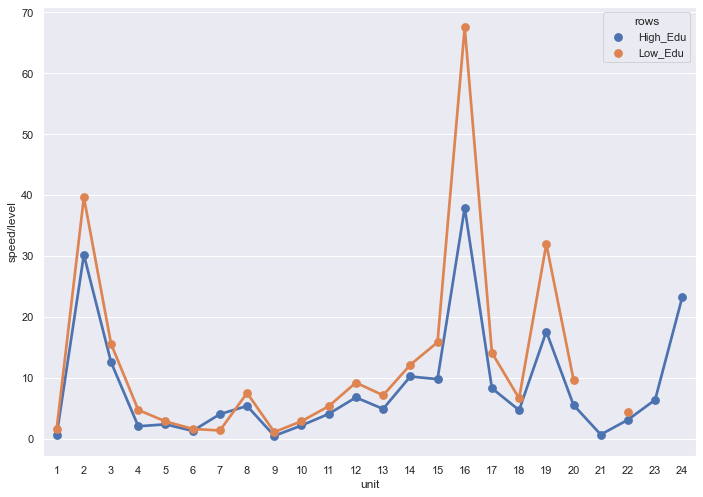

In [87]:
rsm = ratio_stats.melt('unit', var_name='rows', value_name='speed/level')
sns.pointplot(x="unit", y="speed/level", hue='rows', data=rsm)

In [100]:
def score_stats(x):
    df = {}
    idx = []
    
    for unit in range(1,25):
        label_score = 'unit' + str(unit) +'_score'
        label_unit = unit
        df[label_unit] = x[label_score].mean()
        
        idx.append(label_unit)
    return pd.Series(df, index = idx)

score_stats = game_user_log.groupby(['Category']).apply(score_stats)

score_stats = score_stats.T
score_stats['unit'] = score_stats.index

score_stats_part = score_stats.loc[1:20]
score_stats_part

Category,High_Edu,Low_Edu,unit
1,86.537191,100.000000,1
2,84.834764,78.626241,2
3,99.937157,99.852684,3
4,68.915154,63.001845,4
5,88.219685,86.174436,5
6,81.571354,79.787925,6
7,94.415366,90.169916,7
8,82.664028,87.579267,8
9,85.049392,82.671769,9
10,94.906689,93.628143,10


<AxesSubplot:xlabel='unit', ylabel='score'>

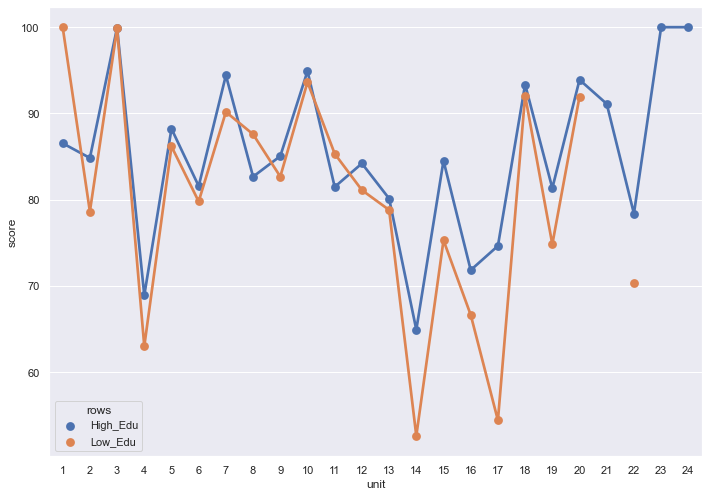

In [102]:
ssm = score_stats.melt('unit', var_name='rows', value_name='score')
sns.pointplot(x="unit", y="score", hue='rows', data=ssm)